In [1]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

from optimization_algorithms import (
    SGD,
    WASGD,
    SNARiccati,
    WASNARiccati,
    USNA,
    UWASNA,
    SNA,  # without Riccati
    WASNA,  # without Riccati
)

N = 20
n = 10_000

optimizer_list = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNARiccati(nu=1.0),
    WASNARiccati(nu=1.0),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
]

optimizer_list_without_riccati = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNA(nu=1.0),
    WASNA(),
    USNA(nu=1.0, gamma=0.75, c_nu=5.0, generate_Z="canonic"),
    UWASNA(gamma=0.75, c_nu=5.0, generate_Z="canonic"),
]

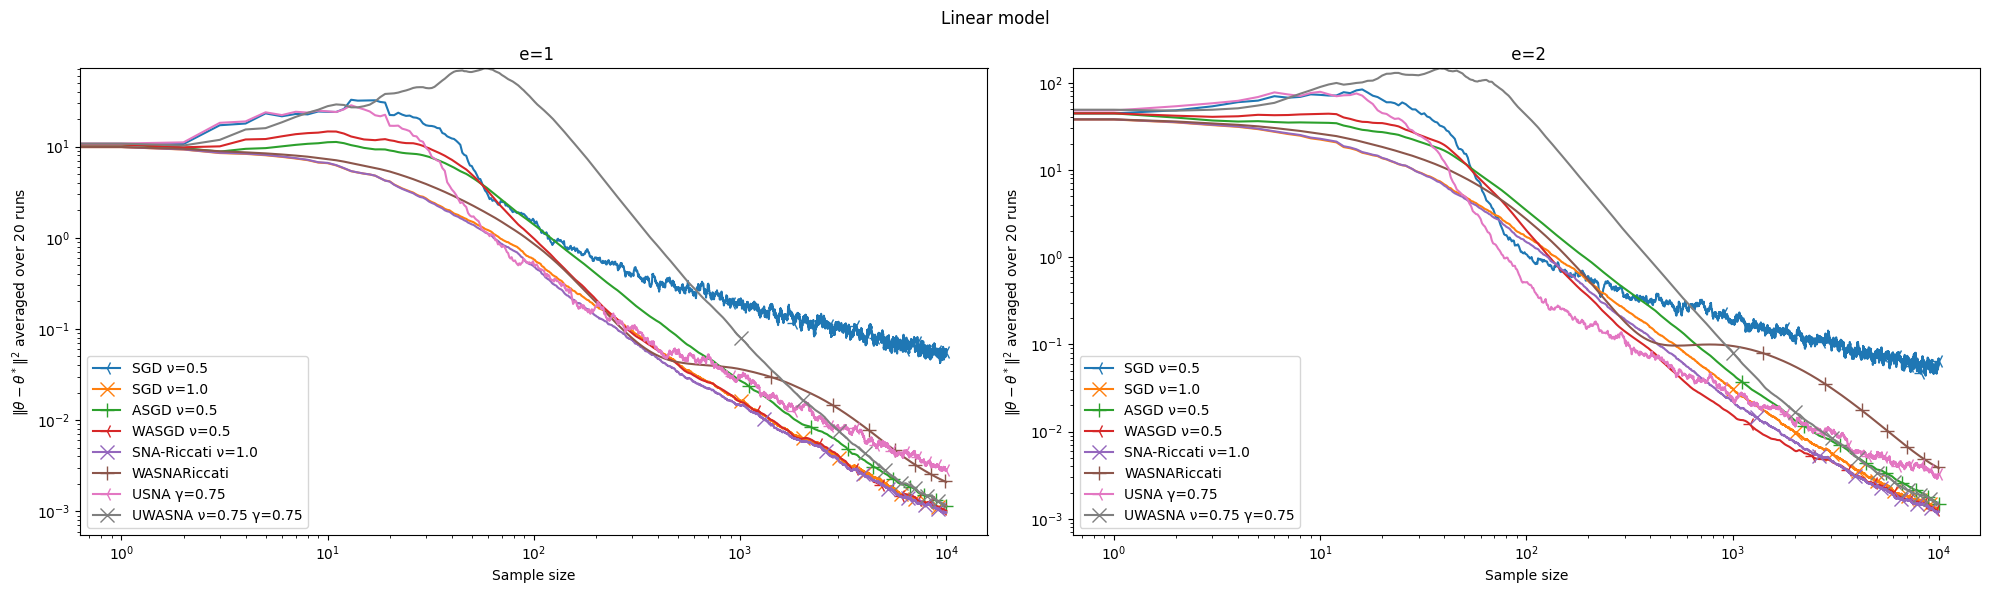

In [2]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

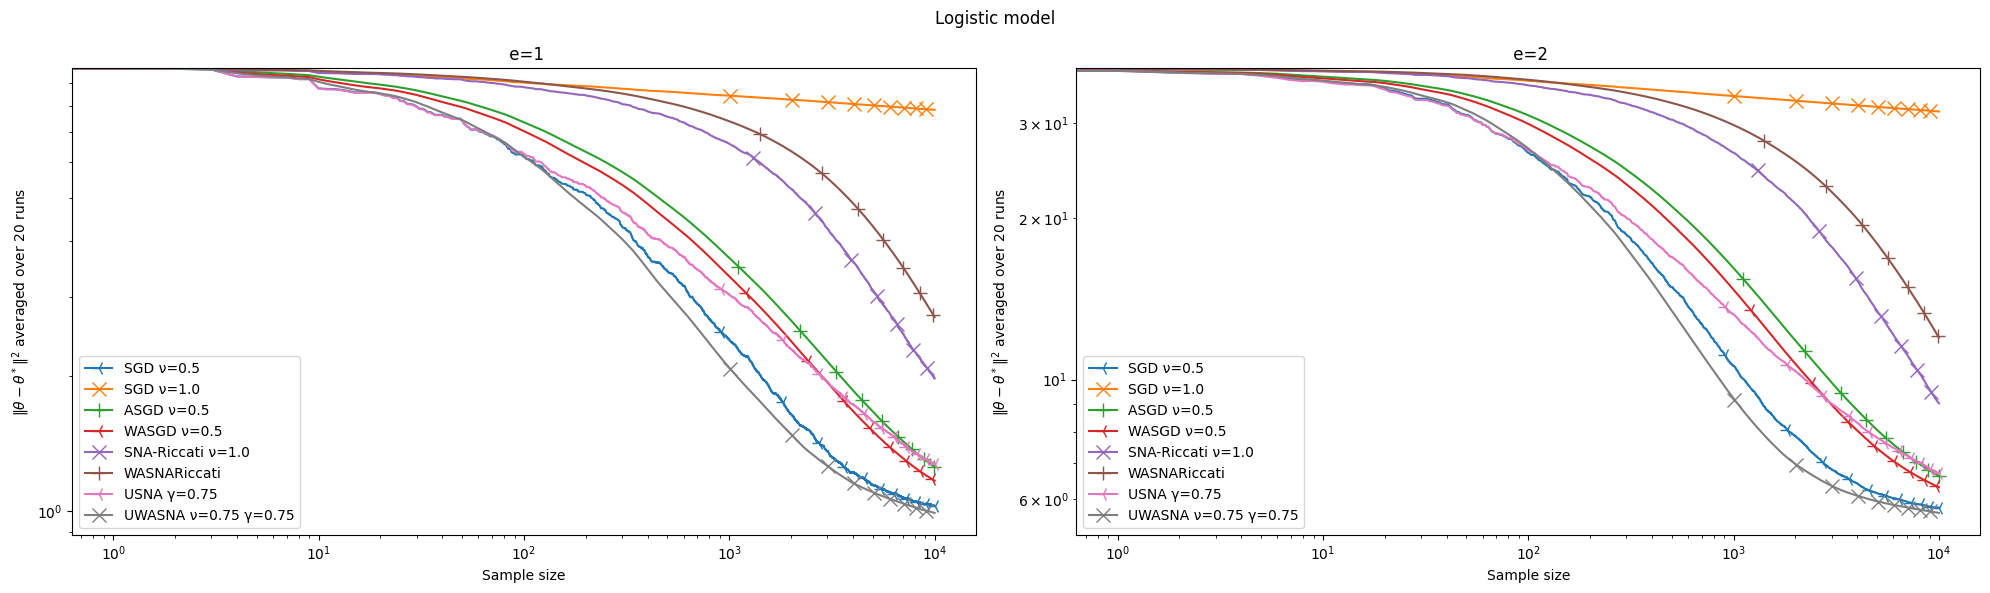

In [3]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

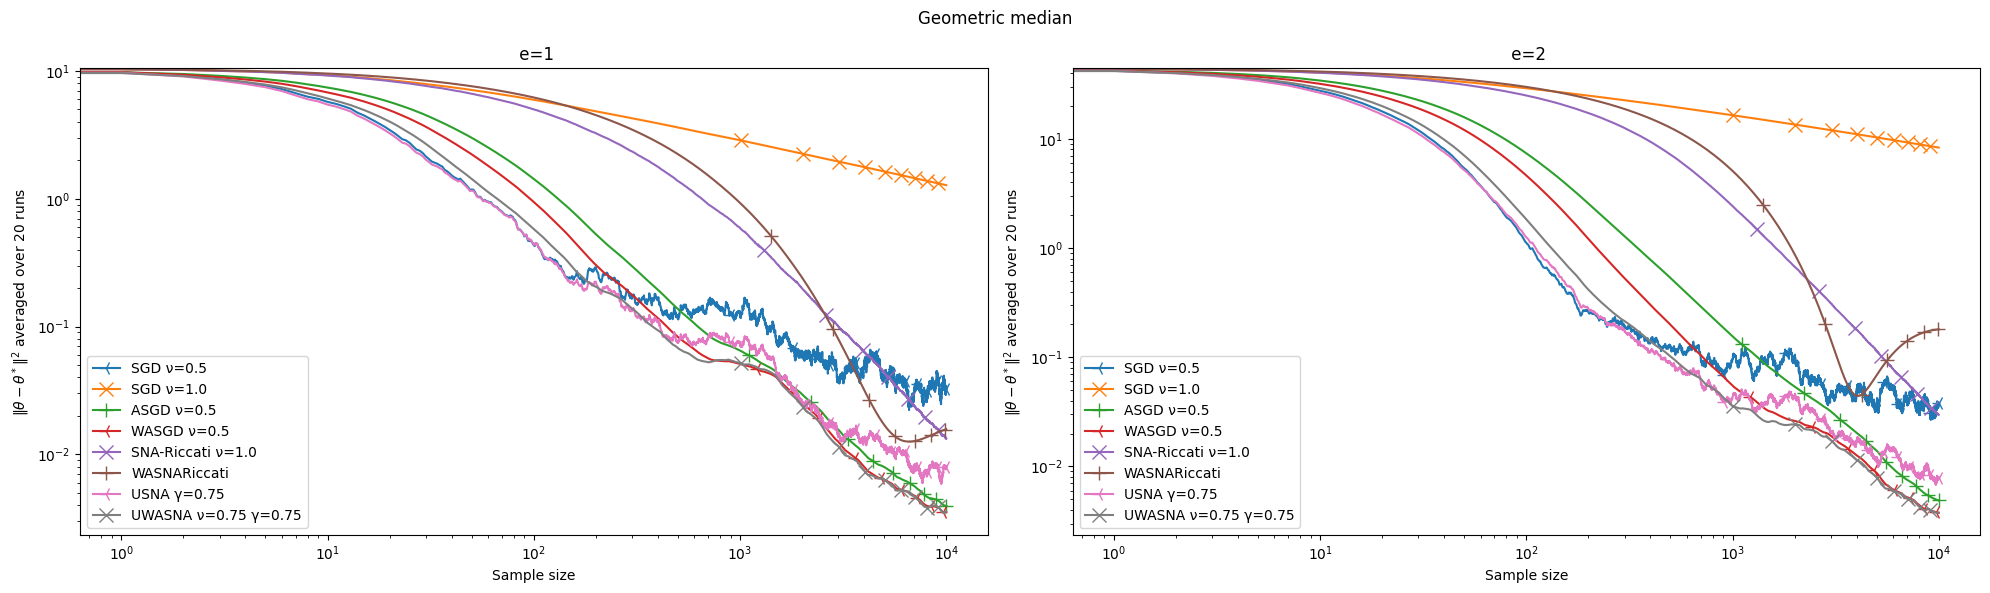

In [2]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

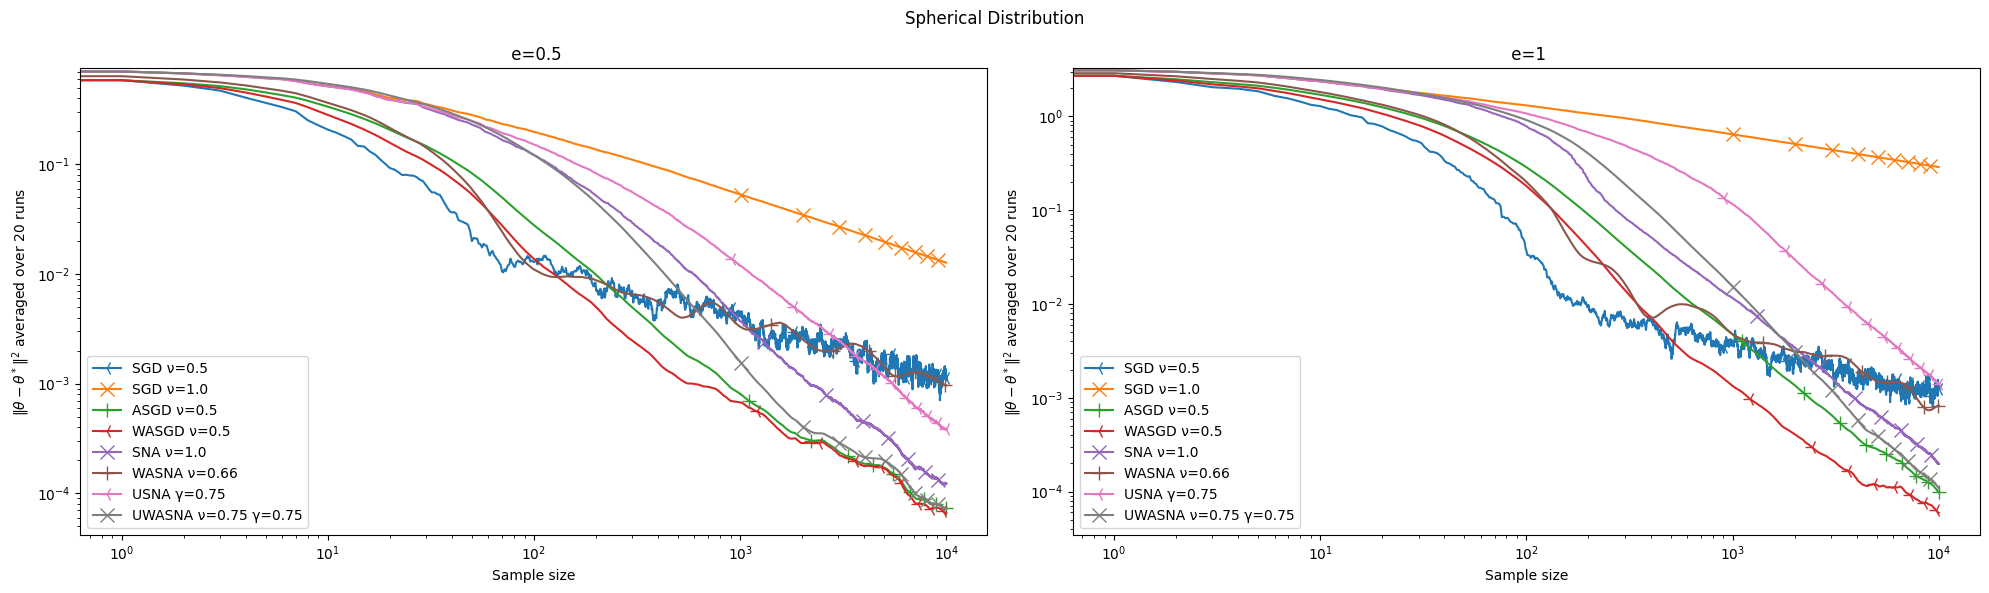

In [2]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n)

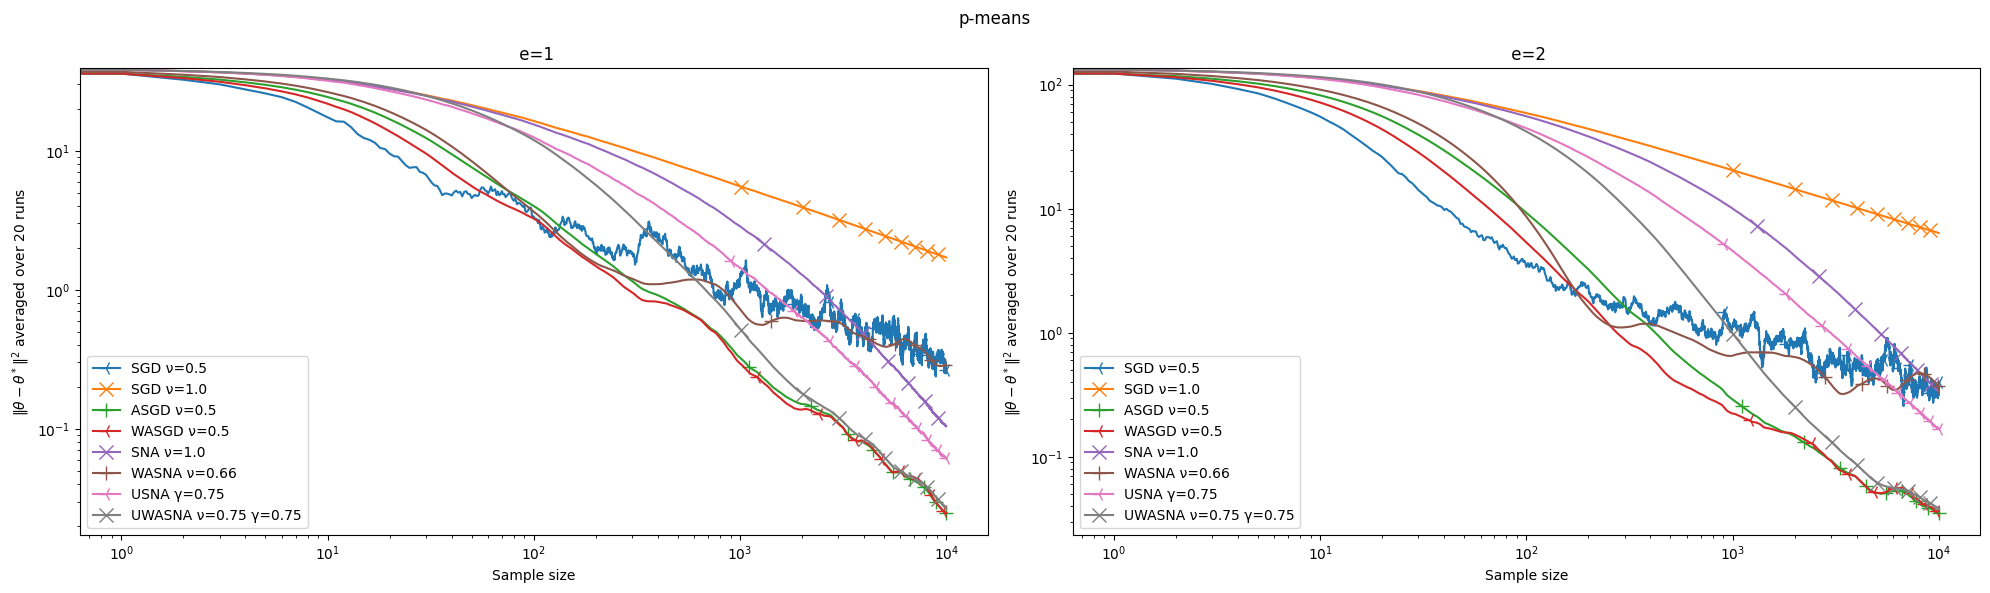

In [3]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

In [4]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/8 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,SGD ν=0.5,SGD ν=1.0,ASGD ν=0.5,WASGD ν=0.5,SNA-Riccati ν=1.0,WASNARiccati ν=0.66,USNA γ=0.75,UWASNA ν=0.75 γ=0.75
Training Accuracy,70.590000,72.090000,72.450000,72.710000,76.520000,67.370000,64.190000,72.660000
Test Accuracy,70.710000,72.220000,72.590000,72.880000,76.650000,67.520000,63.990000,72.840000
